In [1]:
import csv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [3]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,8.)})
sns.set_style("whitegrid")

In [4]:
df2 = pd.read_csv('data/Naturgy.csv')
df2

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,10.12.2021,"25,290","25,050","25,330","24,610","574,42K","0,12%"
1,09.12.2021,"25,260","25,160","25,330","25,080","346,85K","0,72%"
2,08.12.2021,"25,080","25,120","25,430","25,080","426,70K","-0,48%"
3,07.12.2021,"25,200","25,070","25,410","24,970","716,16K","1,00%"
4,06.12.2021,"24,950","24,280","25,120","24,280","803,49K","1,84%"
...,...,...,...,...,...,...,...
238,08.01.2021,"20,270","19,940","20,270","19,640","1,11M","2,61%"
239,07.01.2021,"19,755","19,505","19,855","19,235","2,20M","2,44%"
240,06.01.2021,"19,285","18,840","19,415","18,840","812,87K","1,88%"
241,05.01.2021,"18,930","19,020","19,095","18,795","671,29K","-0,71%"


In [5]:
df2["Último"] = df2["Último"].str.replace(",", ".")
df2["Apertura"] = df2["Apertura"].str.replace(",", ".")
df2["Máximo"] = df2["Máximo"].str.replace(",", ".")
df2["Mínimo"] = df2["Mínimo"].str.replace(",", ".")
df2["Vol."] = df2["Vol."].str.replace(",", ".")
df2["% var."] = df2["% var."].str.replace(",", ".")

In [6]:
df2 = df2.astype({"Último" : "float"})

In [7]:
df2 = df2.astype({"Apertura" : "float"})

In [8]:
df2 = df2.astype({"Máximo" : "float"})

In [9]:
df2 = df2.astype({"Mínimo" : "float"})

In [10]:
def astype_vol(x):
    try:
        return float(x) 
    except: 
        return np.nan

In [11]:
df2.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,10.12.2021,25.29,25.05,25.33,24.61,574.42K,0.12%
1,09.12.2021,25.26,25.16,25.33,25.08,346.85K,0.72%
2,08.12.2021,25.08,25.12,25.43,25.08,426.70K,-0.48%
3,07.12.2021,25.20,25.07,25.41,24.97,716.16K,1.00%
4,06.12.2021,24.95,24.28,25.12,24.28,803.49K,1.84%


In [12]:
df2["Vol."] = df2["Vol."].str.replace("K","")
df2["% var."] = df2["% var."].str.replace("%","")

In [13]:
df2["Vol."] = df2["Vol."].apply(astype_vol)

In [14]:
df2["% var."] = df2["% var."].apply(astype_vol)


In [15]:
df2['date'] = pd.to_datetime(df2['Fecha']).dt.date

In [16]:
df2[["Fecha2"]] = df2[["Fecha"]].apply(pd.to_datetime)# ME DESCUADRA LA TABLA

In [17]:
df2.dtypes

Fecha               object
Último             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.               float64
% var.             float64
date                object
Fecha2      datetime64[ns]
dtype: object

In [18]:
df2.head(2)

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.,date,Fecha2
0,10.12.2021,25.29,25.05,25.33,24.61,574.42,0.12,2021-10-12,2021-10-12
1,09.12.2021,25.26,25.16,25.33,25.08,346.85,0.72,2021-09-12,2021-09-12


In [19]:
#df2.yea

In [20]:
def month(x):
    return x.split('.')[1]
def year(x):
    return x.split('.')[2]

In [21]:
df2['month'] = df2['Fecha'].apply(month)
df2['year'] = df2['Fecha'].apply(year)

In [22]:
empresax = pd.DataFrame(df2.groupby(["year", "month"])["Apertura"].mean()).reset_index()

In [23]:
empresax.head()

,year,month,Apertura
0,2021,01,20.250750
1,2021,02,20.873000
2,2021,03,20.980435
3,2021,04,20.934500
4,2021,05,21.517143


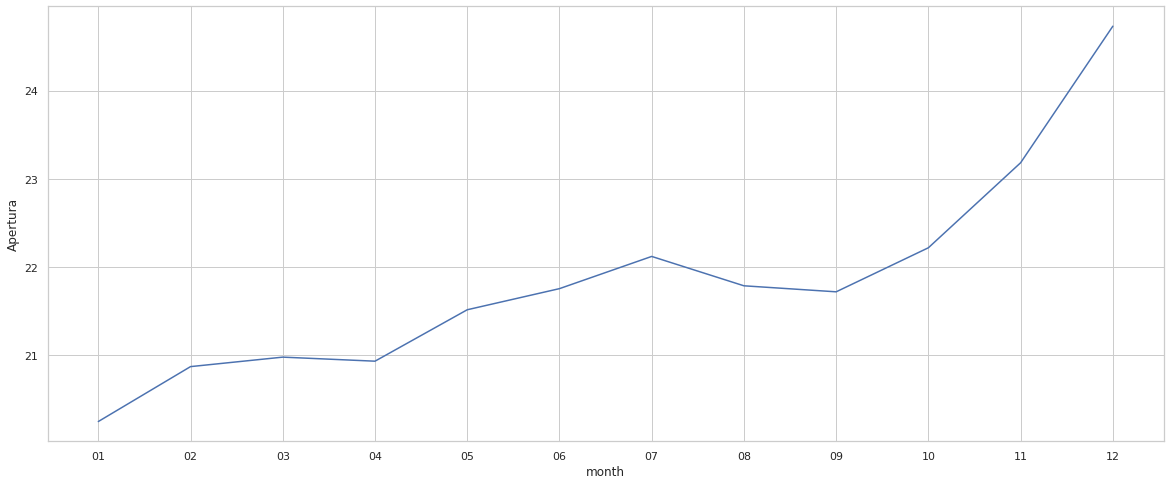

In [24]:
sns.lineplot(data = empresax, x = "month", y = "Apertura");

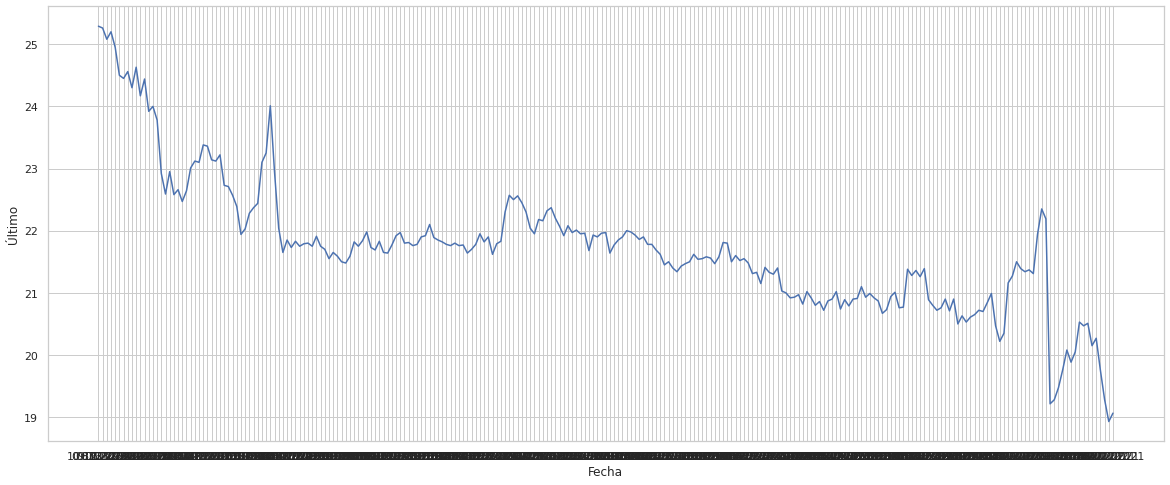

In [25]:
sns.lineplot(data = df2, x = "Fecha", y = "Último");

In [26]:
#Selector de archivos csv y filtrado por columnas

In [27]:
with open('data/Acciona.csv') as csvarchivo:
    entrada = csv.DictReader(csvarchivo)
    for reg in entrada:
        print(reg['Último'])

158,600
159,800
159,100
161,800
158,300
155,200
155,200
159,500
157,500
159,000
159,300
163,000
160,900
159,400
160,400
158,800
158,400
160,900
162,000
161,500
159,500
159,100
159,700
157,200
157,700
157,000
159,100
159,500
166,900
166,000
165,800
167,100
164,400
163,200
162,600
161,100
157,800
156,000
151,500
148,700
151,200
148,300
147,300
145,300
142,500
144,100
143,400
140,900
142,200
142,200
143,900
143,200
144,500
143,300
149,000
147,200
145,700
144,600
145,000
139,900
144,100
141,000
146,000
148,000
148,100
143,700
143,400
141,200
140,000
141,000
141,600
142,200
139,800
137,600
137,900
137,000
136,900
140,100
140,700
140,600
139,800
139,500
141,000
138,300
138,000
137,700
137,200
135,800
135,300
133,200
130,400
131,500
130,500
128,100
129,700
129,200
133,100
131,800
130,500
131,800
131,500
129,500
128,300
125,800
125,000
127,000
125,700
127,300
128,600
128,100
127,200
124,900
127,600
124,800
124,300
128,800
129,400
127,300
127,900
127,200
126,700
127,000
125,200
126,800
127,400


In [28]:
df = pd.read_csv("data/Acciona.csv", sep=";")


# Cambiando el tipo de dato en fecha
df["Fecha"] = pd.to_datetime(df["Fecha"],format='%Y-%m-%d')



# Creando función
def funcion_graficar(valor):

    #Filtrando el pais
    df_filtrado = df[df["Último"] == valor]
    
    
    if df_filtrado.shape[0] == 0:
        print("Empresa no encontrada!!")
    else:
    # Graficando
        df_filtrado.plot(x ='Fecha', y='Últ.Valor', kind = 'bar')

# Corriendo función que genera la gráfica

pais = input("Ingrese la empresa: ")
funcion_graficar(valor)

KeyError: 'Fecha'